In [2]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a set of random lat and lng combos
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add lats and lngs to list
coordinates = list(lat_lngs)

In [5]:
from citipy import citipy

In [6]:
# Create cities list
cities = []

# Identify nearest city for each lat and lng combo
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If city is unique, add to cities list
    if city not in cities:
        cities.append(city)
        
# Print city count to confirm sufficient count
len(cities)

602

In [7]:
# Pseudocode
# Import our dependencies and initialize counters and an empty list that will hold the weather data.
# Loop through the cities list.
# Group the cities in sets of 50 to log the process as we find the weather data for each city.
### Two counters will be needed here: one to log the city count from 1 to 50, and another for the sets.
# Build the city_url or endpoint for each city.
# Log the URL and the record and set numbers.
# Make an API request for each city.
# Parse the JSON weather data for the following:
### City, country, and date
### Latitude and longitude
### Maximum temperature
### Humidity
### Cloudiness
### Wind speed
# Add the data to a list in a dictionary format and then convert the list to a DataFrame.

In [8]:
# Import requests library
import requests

# Import API key
from config import weather_api_key

# Import time library and datetime module from the datetime library 
import time
from datetime import datetime

# Starting URL for Weather Map API Call
url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Create empty list to hold weather data
city_data = []

# Print the beginning of the log
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count =1

# Loop through cities in the list
for i, city in enumerate(cities):
    
    # Group cities in sets of 50
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # Create endpoint URL for each city
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the URL, record, and set numbers and city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to record count
    record_count += 1
    
    try:
        # Parse JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime("%Y-%m-%d %H:%M:%S")
        
        # Append city information into city_data list
        city_data.append({"City": city.title(),
                         "Lat": city_lat,
                         "Lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date})
        
# If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    
# Indicate that data loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mar del plata
Processing Record 2 of Set 1 | port alfred
Processing Record 3 of Set 1 | khurai
Processing Record 4 of Set 1 | alakurtti
Processing Record 5 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 6 of Set 1 | bokoro
Processing Record 7 of Set 1 | khasan
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | butaritari
Processing Record 12 of Set 1 | ribeira grande
Processing Record 13 of Set 1 | tuy hoa
Processing Record 14 of Set 1 | calabozo
Processing Record 15 of Set 1 | half moon bay
Processing Record 16 of Set 1 | hithadhoo
Processing Record 17 of Set 1 | severo-kurilsk
Processing Record 18 of Set 1 | muisne
Processing Record 19 of Set 1 | busselton
Processing Record 20 of Set 1 | ketou
Processing Record 21 of Set 1 | vardo
Processing Record 22 of Set 1 | belushya 

Processing Record 42 of Set 4 | sarangani
Processing Record 43 of Set 4 | mercedes
Processing Record 44 of Set 4 | mouzakion
City not found. Skipping...
Processing Record 45 of Set 4 | cayenne
Processing Record 46 of Set 4 | portel
Processing Record 47 of Set 4 | hay river
Processing Record 48 of Set 4 | pundaguitan
Processing Record 49 of Set 4 | necochea
Processing Record 50 of Set 4 | aklavik
Processing Record 1 of Set 5 | kijang
Processing Record 2 of Set 5 | yamada
Processing Record 3 of Set 5 | mareeba
Processing Record 4 of Set 5 | natal
Processing Record 5 of Set 5 | semnan
Processing Record 6 of Set 5 | shache
Processing Record 7 of Set 5 | toora-khem
Processing Record 8 of Set 5 | san ignacio
Processing Record 9 of Set 5 | panaba
Processing Record 10 of Set 5 | atlantic beach
Processing Record 11 of Set 5 | kuche
City not found. Skipping...
Processing Record 12 of Set 5 | ilulissat
Processing Record 13 of Set 5 | santa maria
Processing Record 14 of Set 5 | sept-iles
Processin

Processing Record 31 of Set 8 | nagato
Processing Record 32 of Set 8 | goundam
Processing Record 33 of Set 8 | lisa
Processing Record 34 of Set 8 | grand river south east
City not found. Skipping...
Processing Record 35 of Set 8 | kushmurun
Processing Record 36 of Set 8 | chisindia
Processing Record 37 of Set 8 | yingcheng
Processing Record 38 of Set 8 | wilmington
Processing Record 39 of Set 8 | fortuna
Processing Record 40 of Set 8 | qaqortoq
Processing Record 41 of Set 8 | kumbo
Processing Record 42 of Set 8 | senekal
Processing Record 43 of Set 8 | yeppoon
Processing Record 44 of Set 8 | sumbawa
City not found. Skipping...
Processing Record 45 of Set 8 | douala
Processing Record 46 of Set 8 | lasa
Processing Record 47 of Set 8 | komsomolsk
Processing Record 48 of Set 8 | mehamn
Processing Record 49 of Set 8 | amderma
City not found. Skipping...
Processing Record 50 of Set 8 | copiapo
Processing Record 1 of Set 9 | manokwari
Processing Record 2 of Set 9 | pitimbu
Processing Record 3

Processing Record 19 of Set 12 | kimbe
Processing Record 20 of Set 12 | sinkat
City not found. Skipping...
Processing Record 21 of Set 12 | pacifica
Processing Record 22 of Set 12 | monte alegre
Processing Record 23 of Set 12 | chiredzi
Processing Record 24 of Set 12 | gornopravdinsk
Processing Record 25 of Set 12 | skibbereen
Processing Record 26 of Set 12 | sarkand
Processing Record 27 of Set 12 | fort-shevchenko
Processing Record 28 of Set 12 | harigue
City not found. Skipping...
Processing Record 29 of Set 12 | ola
Processing Record 30 of Set 12 | brokopondo
Processing Record 31 of Set 12 | vila do maio
Processing Record 32 of Set 12 | maarianhamina
Processing Record 33 of Set 12 | laguna
Processing Record 34 of Set 12 | baruun-urt
Processing Record 35 of Set 12 | bemidji
Processing Record 36 of Set 12 | ambilobe
Processing Record 37 of Set 12 | karauzyak
City not found. Skipping...
Processing Record 38 of Set 12 | itoman
Processing Record 39 of Set 12 | vestmannaeyjar
Processing R

In [10]:
# Convert the array of dictionaries to DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mar Del Plata,-38.0023,-57.5575,48.22,86,20,10.00,AR,2022-05-01 11:25:22
1,Port Alfred,-33.5906,26.8910,71.19,57,52,5.99,ZA,2022-05-01 11:25:23
2,Khurai,24.0436,78.3319,106.75,11,29,10.47,IN,2022-05-01 11:25:24
3,Alakurtti,66.9672,30.3491,36.95,50,77,8.52,RU,2022-05-01 11:25:25
4,Bokoro,12.3807,17.0568,105.64,19,90,8.10,TD,2022-05-01 11:25:27
5,Khasan,42.4308,130.6434,46.00,61,90,4.47,RU,2022-05-01 11:25:28
6,Ushuaia,-54.8000,-68.3000,47.86,57,40,4.61,AR,2022-05-01 11:25:29
7,Albany,42.6001,-73.9662,42.73,68,1,2.24,US,2022-05-01 11:25:30
8,Mataura,-46.1927,168.8643,52.48,99,96,2.19,NZ,2022-05-01 11:25:31
9,Butaritari,3.0707,172.7902,80.96,81,93,12.06,KI,2022-05-01 11:25:32


In [11]:
# Re-order columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mar Del Plata,AR,2022-05-01 11:25:22,-38.0023,-57.5575,48.22,86,20,10.00
1,Port Alfred,ZA,2022-05-01 11:25:23,-33.5906,26.8910,71.19,57,52,5.99
2,Khurai,IN,2022-05-01 11:25:24,24.0436,78.3319,106.75,11,29,10.47
3,Alakurtti,RU,2022-05-01 11:25:25,66.9672,30.3491,36.95,50,77,8.52
4,Bokoro,TD,2022-05-01 11:25:27,12.3807,17.0568,105.64,19,90,8.10


In [12]:
# Create output CSV
output_data_file = "Weather Data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

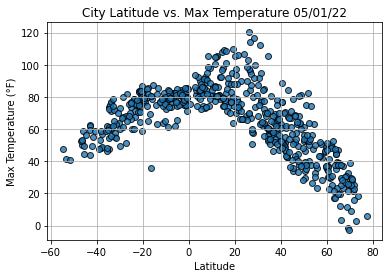

In [13]:
# Import time module
import time

# Build scatter plot for lat vs. max temp
plt.scatter(city_data_df["Lat"],
            city_data_df["Max Temp"],
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (°F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Weather Data/Fig1.png")

# Show plot
plt.show()

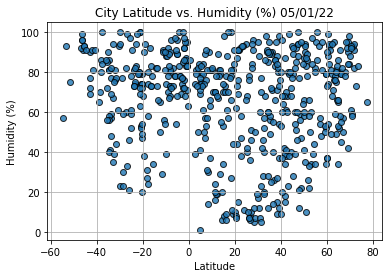

In [14]:
# Build scatter plot for lat vs. humidity
plt.scatter(city_data_df["Lat"],
            city_data_df["Humidity"],
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate other graph properties
plt.title(f"City Latitude vs. Humidity (%) "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Weather Data/Fig2.png")

# Show plot.
plt.show()

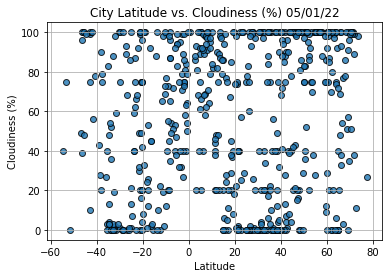

In [15]:
# Build scatter plot for lat vs. cloudiness
plt.scatter(city_data_df["Lat"],
            city_data_df["Cloudiness"],
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate other graph properties
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Weather Data/Fig3.png")

# Show plot.
plt.show()

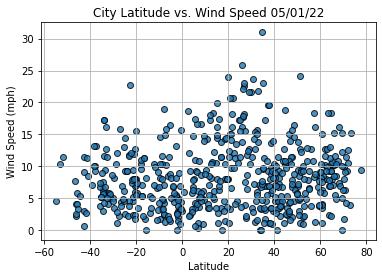

In [16]:
# Build scatter plots for lat vs. wind speed
plt.scatter(city_data_df["Lat"],
            city_data_df["Wind Speed"],
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Weather Data/Fig4.png")

# Show plot.
plt.show()

In [17]:
# Import linregress
from scipy.stats import linregress

# Create a function to perform linear regression on weather data
# and plot a regression line and equation with the data
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept
    
    # Get equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create scatter plot and plot regression line
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.show()

In [18]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Khurai,IN,2022-05-01 11:25:24,24.0436,78.3319,106.75,11,29,10.47
3,Alakurtti,RU,2022-05-01 11:25:25,66.9672,30.3491,36.95,50,77,8.52
4,Bokoro,TD,2022-05-01 11:25:27,12.3807,17.0568,105.64,19,90,8.10
5,Khasan,RU,2022-05-01 11:25:28,42.4308,130.6434,46.00,61,90,4.47
7,Albany,US,2022-05-01 11:25:30,42.6001,-73.9662,42.73,68,1,2.24


In [19]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

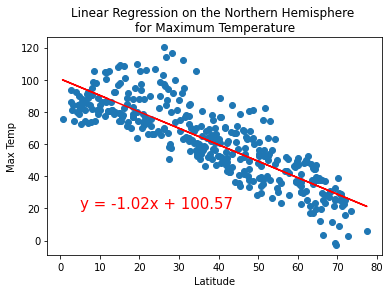

In [24]:
# Linear regression for Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call function
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere \nfor Maximum Temperature",
                       "Max Temp",(5, 20))

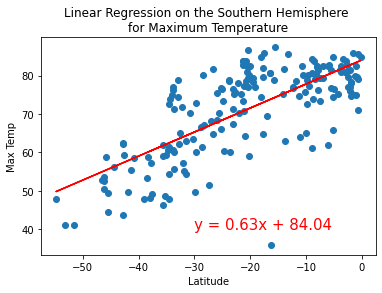

In [28]:
# Linear regression for Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call function
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere \nfor Maximum Temperature",
                       "Max Temp",(-30,40))

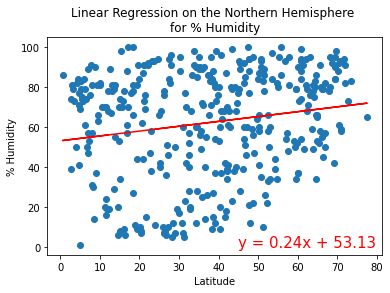

In [31]:
# Linear regression for Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call function
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere \nfor % Humidity",
                       "% Humidity",(45,0))

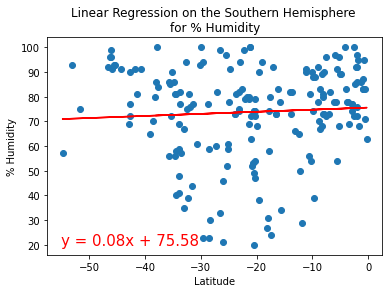

In [36]:
# Linear regression for Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call function
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere \nfor % Humidity",
                       "% Humidity",(-55,20))

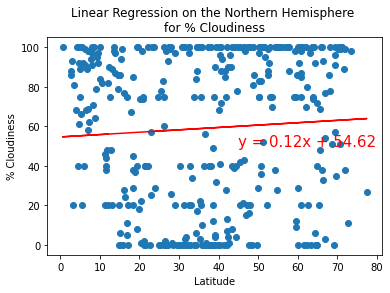

In [40]:
# Linear regression for Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call function
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere \nfor % Cloudiness",
                       "% Cloudiness",(45,50))

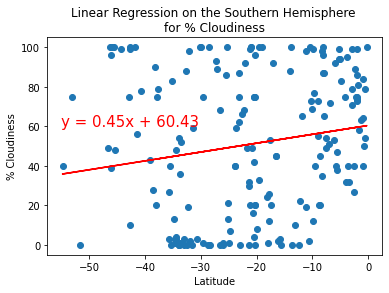

In [42]:
# Linear regression for Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call function
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere \nfor % Cloudiness",
                       "% Cloudiness",(-55,60))

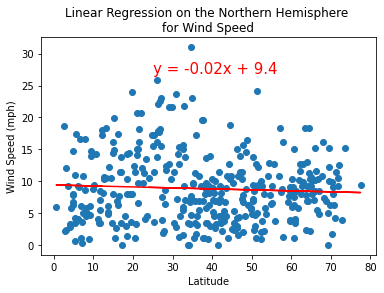

In [47]:
# Linear regression for Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call function
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere \nfor Wind Speed",
                       "Wind Speed (mph)",(25,27))

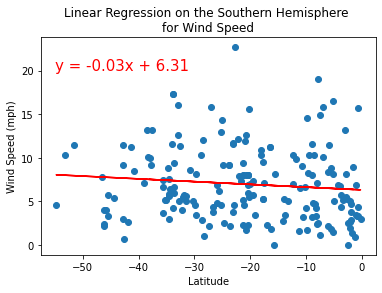

In [49]:
# Linear regression for Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call function
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere \nfor Wind Speed",
                       "Wind Speed (mph)",(-55,20))